* read the texts
* format them
* lemmatize
* stem 
* clear the garbage
* do tf-idf
* do K-Means

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.stem.porter import PorterStemmer

import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/lodya/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
import os
from pathlib import Path

In [13]:
df = pd.DataFrame(columns=('id', 'text'))

In [14]:
import re
from tqdm import tqdm

In [15]:
dirpath = '/home/lodya/Desktop/Projects/Term_Project_1/subs/plain'
data = []
for filename in tqdm(os.listdir(dirpath)):
    with open(Path(dirpath, filename)) as f:
        text_id = filename.split('.')[0]
        text = f.read()
        text = re.sub('\[.*\]|-', '', text)
        data.append((text_id, text))
df = pd.DataFrame(data=data, columns=('id', 'text'))

100%|██████████| 2769/2769 [00:00<00:00, 4284.81it/s]


In [16]:
df.head()

,id,text
0,cSw5R-jdMiI,Let g of x equal one over x. Can we use the ...
1,ieC5LgoGJVg,So we've got the expression two X plus four ...
2,AhnJtTI_DMM,Let's find the limit of f of x times h of x ...
3,O_yeKo6-qIg,Anytime you're trying to come up with a mech...
4,HiY5UElqfhs,If a sub n is equal to n squared minus 10 ov...


In [17]:
# remove bracketed comments at the beggining of the texts

In [22]:
stemmer = PorterStemmer()

def stem_words(words_list, stemmer):
    return [stemmer.stem(word) for word in words_list]

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_words(tokens, stemmer)
    return stems

In [56]:
tf_idf = TfidfVectorizer(stop_words='english')

In [57]:
matrix = tf_idf.fit_transform(df['text'])


  2%|▏         | 2/99 [00:00<00:10,  9.43it/s]

Fit 2 clusters
Fit 3 clusters



  4%|▍         | 4/99 [00:00<00:11,  8.28it/s]

Fit 4 clusters
Fit 5 clusters



  5%|▌         | 5/99 [00:00<00:14,  6.34it/s]

Fit 6 clusters



  6%|▌         | 6/99 [00:00<00:17,  5.29it/s]

Fit 7 clusters



  7%|▋         | 7/99 [00:01<00:21,  4.26it/s]

Fit 8 clusters



  8%|▊         | 8/99 [00:01<00:29,  3.04it/s]

Fit 9 clusters



  9%|▉         | 9/99 [00:02<00:34,  2.65it/s]

Fit 10 clusters



 10%|█         | 10/99 [00:02<00:36,  2.42it/s]

Fit 11 clusters



 11%|█         | 11/99 [00:03<00:38,  2.28it/s]

Fit 12 clusters



 12%|█▏        | 12/99 [00:04<00:44,  1.96it/s]

Fit 13 clusters



 13%|█▎        | 13/99 [00:04<00:55,  1.56it/s]

Fit 14 clusters



 14%|█▍        | 14/99 [00:05<00:56,  1.51it/s]

Fit 15 clusters



 15%|█▌        | 15/99 [00:06<00:57,  1.47it/s]

Fit 16 clusters



 16%|█▌        | 16/99 [00:07<00:58,  1.42it/s]

Fit 17 clusters



 17%|█▋        | 17/99 [00:07<00:59,  1.37it/s]

Fit 18 clusters



 18%|█▊        | 18/99 [00:08<01:01,  1.31it/s]

Fit 19 clusters



 19%|█▉        | 19/99 [00:09<01:04,  1.23it/s]

Fit 20 clusters



 20%|██        | 20/99 [00:11<01:16,  1.03it/s]

Fit 21 clusters



 21%|██        | 21/99 [00:12<01:27,  1.12s/it]

Fit 22 clusters



 22%|██▏       | 22/99 [00:14<01:34,  1.23s/it]

Fit 23 clusters



 23%|██▎       | 23/99 [00:15<01:35,  1.25s/it]

Fit 24 clusters



 24%|██▍       | 24/99 [00:16<01:39,  1.33s/it]

Fit 25 clusters



 25%|██▌       | 25/99 [00:18<01:35,  1.30s/it]

Fit 26 clusters



 26%|██▋       | 26/99 [00:19<01:37,  1.34s/it]

Fit 27 clusters



 27%|██▋       | 27/99 [00:21<01:47,  1.49s/it]

Fit 28 clusters



 28%|██▊       | 28/99 [00:22<01:46,  1.50s/it]

Fit 29 clusters



 29%|██▉       | 29/99 [00:24<01:57,  1.68s/it]

Fit 30 clusters



 30%|███       | 30/99 [00:26<01:55,  1.67s/it]

Fit 31 clusters



 31%|███▏      | 31/99 [00:28<01:53,  1.67s/it]

Fit 32 clusters



 32%|███▏      | 32/99 [00:29<01:49,  1.63s/it]

Fit 33 clusters



 33%|███▎      | 33/99 [00:31<01:44,  1.58s/it]

Fit 34 clusters



 34%|███▍      | 34/99 [00:33<01:52,  1.73s/it]

Fit 35 clusters



 35%|███▌      | 35/99 [00:35<01:59,  1.86s/it]

Fit 36 clusters



 36%|███▋      | 36/99 [00:38<02:10,  2.07s/it]

Fit 37 clusters



 37%|███▋      | 37/99 [00:40<02:15,  2.18s/it]

Fit 38 clusters



 38%|███▊      | 38/99 [00:43<02:22,  2.34s/it]

Fit 39 clusters



 39%|███▉      | 39/99 [00:45<02:10,  2.18s/it]

Fit 40 clusters



 40%|████      | 40/99 [00:46<02:02,  2.08s/it]

Fit 41 clusters



 41%|████▏     | 41/99 [00:48<01:56,  2.01s/it]

Fit 42 clusters



 42%|████▏     | 42/99 [00:50<01:54,  2.01s/it]

Fit 43 clusters



 43%|████▎     | 43/99 [00:53<02:09,  2.31s/it]

Fit 44 clusters



 44%|████▍     | 44/99 [00:57<02:27,  2.68s/it]

Fit 45 clusters



 45%|████▌     | 45/99 [01:00<02:27,  2.73s/it]

Fit 46 clusters



 46%|████▋     | 46/99 [01:02<02:15,  2.55s/it]

Fit 47 clusters



 47%|████▋     | 47/99 [01:04<02:06,  2.42s/it]

Fit 48 clusters



 48%|████▊     | 48/99 [01:07<02:11,  2.58s/it]

Fit 49 clusters



 49%|████▉     | 49/99 [01:10<02:14,  2.69s/it]

Fit 50 clusters



 51%|█████     | 50/99 [01:12<02:11,  2.69s/it]

Fit 51 clusters



 52%|█████▏    | 51/99 [01:15<02:08,  2.69s/it]

Fit 52 clusters



 53%|█████▎    | 52/99 [01:18<02:04,  2.65s/it]

Fit 53 clusters



 54%|█████▎    | 53/99 [01:20<02:00,  2.63s/it]

Fit 54 clusters



 55%|█████▍    | 54/99 [01:24<02:14,  2.99s/it]

Fit 55 clusters



 56%|█████▌    | 55/99 [01:28<02:22,  3.23s/it]

Fit 56 clusters



 57%|█████▋    | 56/99 [01:31<02:18,  3.22s/it]

Fit 57 clusters



 58%|█████▊    | 57/99 [01:35<02:22,  3.39s/it]

Fit 58 clusters



 59%|█████▊    | 58/99 [01:38<02:10,  3.17s/it]

Fit 59 clusters



 60%|█████▉    | 59/99 [01:41<02:06,  3.17s/it]

Fit 60 clusters



 61%|██████    | 60/99 [01:44<02:01,  3.11s/it]

Fit 61 clusters



 62%|██████▏   | 61/99 [01:47<01:54,  3.02s/it]

Fit 62 clusters



 63%|██████▎   | 62/99 [01:50<02:01,  3.29s/it]

Fit 63 clusters



 64%|██████▎   | 63/99 [01:54<01:58,  3.30s/it]

Fit 64 clusters



 65%|██████▍   | 64/99 [01:58<02:01,  3.49s/it]

Fit 65 clusters



 66%|██████▌   | 65/99 [02:02<02:04,  3.67s/it]

Fit 66 clusters



 67%|██████▋   | 66/99 [02:05<01:57,  3.56s/it]

Fit 67 clusters



 68%|██████▊   | 67/99 [02:08<01:49,  3.42s/it]

Fit 68 clusters



 69%|██████▊   | 68/99 [02:11<01:43,  3.34s/it]

Fit 69 clusters



 70%|██████▉   | 69/99 [02:15<01:42,  3.42s/it]

Fit 70 clusters



 71%|███████   | 70/99 [02:18<01:38,  3.38s/it]

Fit 71 clusters



 72%|███████▏  | 71/99 [02:23<01:43,  3.69s/it]

Fit 72 clusters



 73%|███████▎  | 72/99 [02:26<01:38,  3.64s/it]

Fit 73 clusters



 74%|███████▎  | 73/99 [02:30<01:33,  3.59s/it]

Fit 74 clusters



 75%|███████▍  | 74/99 [02:33<01:30,  3.61s/it]

Fit 75 clusters



 76%|███████▌  | 75/99 [02:38<01:36,  4.03s/it]

Fit 76 clusters



 77%|███████▋  | 76/99 [02:44<01:41,  4.41s/it]

Fit 77 clusters



 78%|███████▊  | 77/99 [02:49<01:46,  4.84s/it]

Fit 78 clusters



 79%|███████▉  | 78/99 [02:56<01:51,  5.29s/it]

Fit 79 clusters



 80%|███████▉  | 79/99 [03:00<01:39,  4.97s/it]

Fit 80 clusters



 81%|████████  | 80/99 [03:05<01:35,  5.02s/it]

Fit 81 clusters



 82%|████████▏ | 81/99 [03:10<01:27,  4.85s/it]

Fit 82 clusters



 83%|████████▎ | 82/99 [03:15<01:24,  4.99s/it]

Fit 83 clusters



 84%|████████▍ | 83/99 [03:19<01:14,  4.68s/it]

Fit 84 clusters



 85%|████████▍ | 84/99 [03:25<01:16,  5.09s/it]

Fit 85 clusters



 86%|████████▌ | 85/99 [03:29<01:06,  4.76s/it]

Fit 86 clusters



 87%|████████▋ | 86/99 [03:33<00:58,  4.53s/it]

Fit 87 clusters



 88%|████████▊ | 87/99 [03:37<00:53,  4.44s/it]

Fit 88 clusters



 89%|████████▉ | 88/99 [03:44<00:57,  5.26s/it]

Fit 89 clusters



 90%|████████▉ | 89/99 [03:49<00:51,  5.10s/it]

Fit 90 clusters



 91%|█████████ | 90/99 [03:53<00:43,  4.84s/it]

Fit 91 clusters



 92%|█████████▏| 91/99 [03:59<00:40,  5.07s/it]

Fit 92 clusters



 93%|█████████▎| 92/99 [04:05<00:38,  5.48s/it]

Fit 93 clusters



 94%|█████████▍| 93/99 [04:11<00:32,  5.50s/it]

Fit 94 clusters



 95%|█████████▍| 94/99 [04:15<00:25,  5.18s/it]

Fit 95 clusters



 96%|█████████▌| 95/99 [04:20<00:20,  5.07s/it]

Fit 96 clusters



 97%|█████████▋| 96/99 [04:26<00:16,  5.34s/it]

Fit 97 clusters



 98%|█████████▊| 97/99 [04:31<00:10,  5.25s/it]

Fit 98 clusters



 99%|█████████▉| 98/99 [04:37<00:05,  5.53s/it]

Fit 99 clusters



100%|██████████| 99/99 [04:43<00:00,  5.69s/it]


Fit 100 clusters


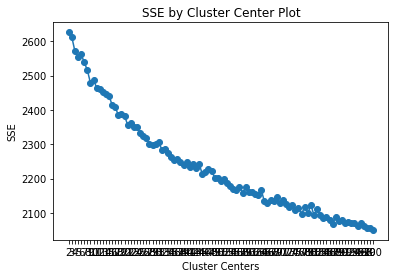

In [69]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in tqdm(iters):
        sse.append(MiniBatchKMeans(n_clusters=k, batch_size=512,random_state=27, verbose=0).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(matrix, 100)

In [74]:
clusters = MiniBatchKMeans(n_clusters=15, random_state=27, verbose=0).fit_predict(matrix)

In [75]:
clusters.shape

(2769,)

In [76]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(matrix, clusters, tf_idf.get_feature_names(), 20)


Cluster 0
let,ohms,r1,response,resistance,inductor,plus,zero,r2,minus,node,capacitor,gonna,resistors,volts,equals,resistor,circuit,current,voltage

Cluster 1
reject,size,statistic,condition,probability,alternative,interval,significance,sampling,true,deviation,standard,mean,distribution,confidence,population,proportion,null,hypothesis,sample

Cluster 2
gradient,gonna,squared,zero,output,like,input,vectors,constant,negative,direction,just,point,kind,component,function,respect,partial,derivative,vector

Cluster 3
positive,gonna,respect,right,power,slope,squared,equals,just,prime,function,let,times,plus,minus,going,derivative,zero,equal,negative

Cluster 4
lady,author,semicolon,just,passage,colon,conjunction,questions,photograph,subject,probability,subordinating,dependent,conjunctions,clauses,cost,sentences,independent,sentence,clause

Cluster 5
power,new,years,court,great,world,rights,really,time,period,amendment,president,american,constitution,united,war,empire,government,states,people


In [ ]:
# let, just, say, 24, 10, like, 